# Iris Dataset Classification with apenet's Neural Network

This notebook demonstrates how to build, train, and evaluate a neural network model using the apenet library, using the Iris Dataset as an example.

## Import Libraries

In [1]:
import torch
## Data processing
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import our library
from apenet.models.builder import ModelBuilder
from apenet.train.trainer import Trainer
from apenet.utils.data import train_test_split
from apenet.loss.losses import CrossEntropyLoss
from apenet.optimizers.optimizers import StochGradDescent

## Set device

In [2]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
device = "cpu"
print(f"Using device: {device}")

Using device: cpu


# Data Overview

## Load and Preprocess Data


In [3]:
# Load and preprocess data
iris = load_iris()
X = torch.tensor(iris.data, dtype=torch.float32, device=device)
y = torch.tensor(iris.target, dtype=torch.long, device=device)


## Data Visualization

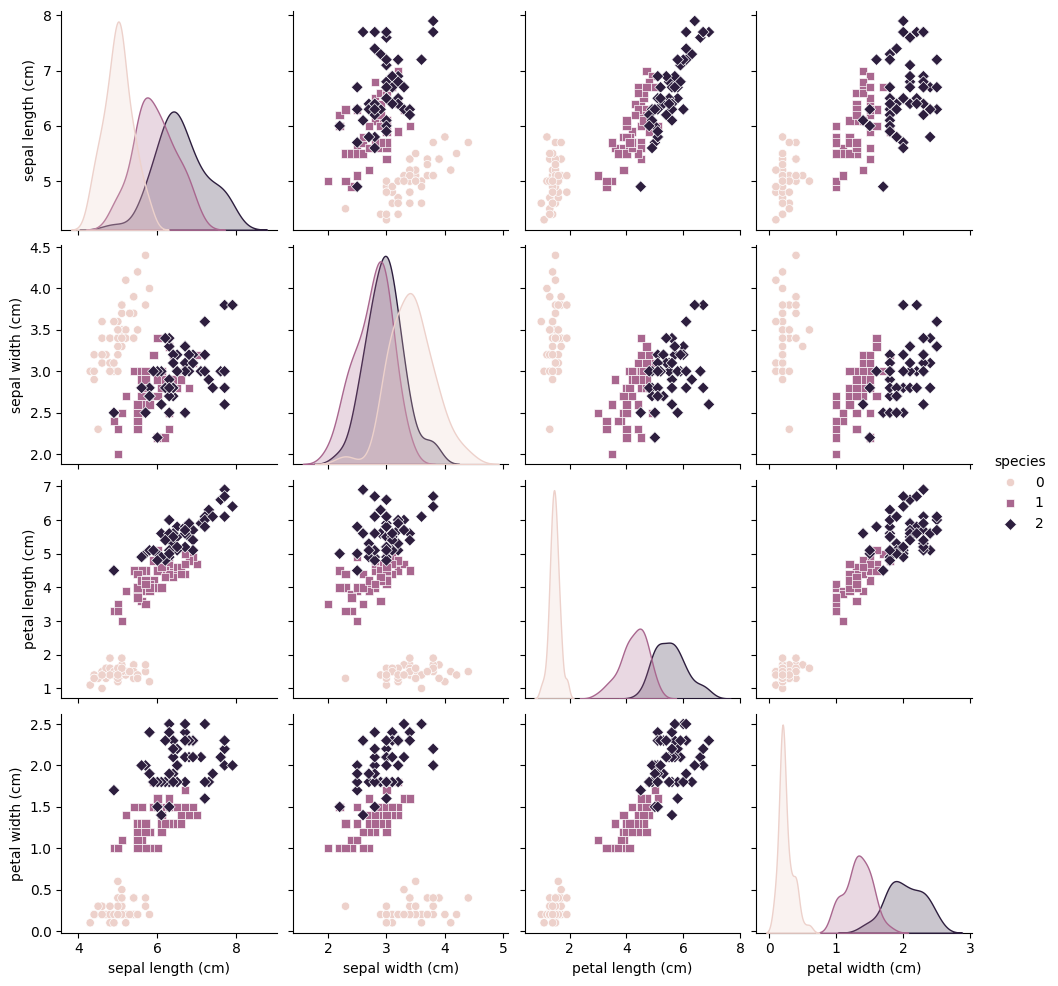

In [4]:
# Create a DataFrame for better visualization
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y

# Pairplot to visualize relationships between features
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()

## Data Preprocessing


In [5]:
# Standardize features
scaler = StandardScaler()
X = torch.tensor(scaler.fit_transform(X), dtype=torch.float32, device=device)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model Overview

## Create Model


In [6]:
builder = ModelBuilder()
model = builder.build_mlp(
    input_size=X_train.shape[1],
    hidden_sizes=[16,8],
    output_size=3,
    hidden_activation='tanh',
    output_activation=None,
    initializer='Xavier'
)


## Define Loss Function and Optimizer


In [7]:
loss_fn = CrossEntropyLoss()
optimizer = StochGradDescent(model.get_parameters(), learning_rate=0.01)

## Create Trainer


In [8]:
# Create trainer
trainer = Trainer(model, loss_fn, optimizer)


## Train Model


In [9]:
# Train model
history = trainer.train(
    epochs=2000,
    batch_size=16,
    verbose=10,
    X_train=X_train, y_train=y_train, X_val=X_test, y_val=y_test
)


Epoch 10/2000: train_loss=1.0367, train_accuracy=0.4083, val_loss=1.0635, val_accuracy=0.2333
Epoch 20/2000: train_loss=0.9714, train_accuracy=0.6417, val_loss=0.9942, val_accuracy=0.6333
Epoch 30/2000: train_loss=0.9202, train_accuracy=0.7250, val_loss=0.9384, val_accuracy=0.8000
Epoch 40/2000: train_loss=0.8786, train_accuracy=0.7500, val_loss=0.8923, val_accuracy=0.8000
Epoch 50/2000: train_loss=0.8435, train_accuracy=0.7833, val_loss=0.8526, val_accuracy=0.8333
Epoch 60/2000: train_loss=0.8139, train_accuracy=0.7833, val_loss=0.8191, val_accuracy=0.8333
Epoch 70/2000: train_loss=0.7881, train_accuracy=0.7833, val_loss=0.7890, val_accuracy=0.8667
Epoch 80/2000: train_loss=0.7647, train_accuracy=0.7917, val_loss=0.7611, val_accuracy=0.8667
Epoch 90/2000: train_loss=0.7439, train_accuracy=0.7917, val_loss=0.7360, val_accuracy=0.8667
Epoch 100/2000: train_loss=0.7251, train_accuracy=0.7917, val_loss=0.7133, val_accuracy=0.8667
Epoch 110/2000: train_loss=0.7080, train_accuracy=0.7917, v

## Evaluate Model


In [10]:
# Evaluate model
metrics = trainer.evaluate(X_test, y_test)
print(f"Test Loss: {metrics['loss']:.4f}, Test Accuracy: {metrics['accuracy']:.4f}")

Test Loss: 0.1036, Test Accuracy: 1.0000


## Plot Training History


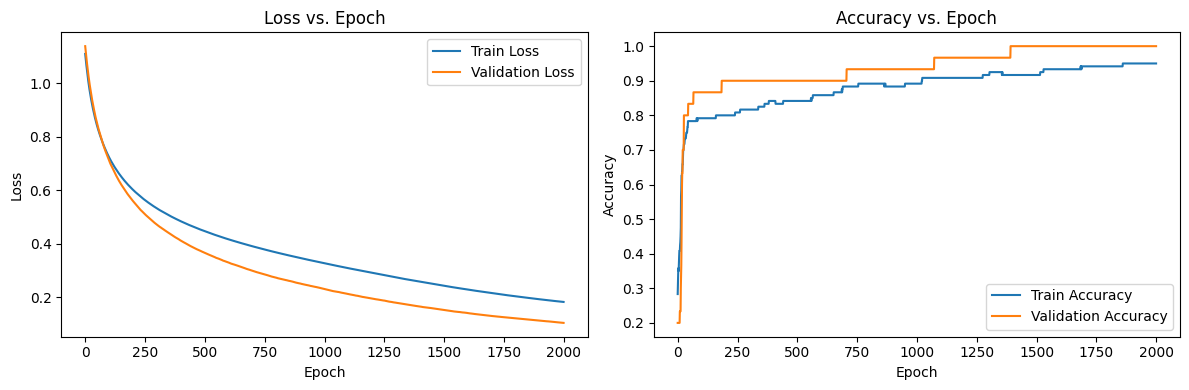

In [11]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()

plt.tight_layout()
plt.show()
